# Plotting Basic Results

We will first show the RMSE and correlation-coefficients of different methods.

In [1]:
import pandas as pd
import numpy as np

# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()

,id,name,elevation,lon,lat,city,address,start_date,end_date
0,466850,五分山雷達站,756.0,121.7812,25.0712,新北市,瑞芳區靜安路四段1巷1號,1988/07/01,NaN
1,466880,板橋,9.7,121.4420,24.9976,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN
2,466900,淡水,19.0,121.4489,25.1649,新北市,淡水區中正東路42巷6號,1942/01/01,NaN
3,466910,鞍部,825.8,121.5297,25.1826,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN
4,466920,臺北,6.3,121.5149,25.0377,臺北市,中正區公園路64號,1896/01/01,NaN


In [2]:
# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
# Our QPE
evlm = pd.read_csv('enclr_th-1_test.csv')
evsvr = pd.read_csv('encsvr_test.csv')
# Prepare data for visualization
cwb = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwb.loc[:,['id','rmse','corr']], on='id')
complm = cwb.merge(evlm.loc[:,['id','rmse','corr']], on='id', suffixes=('_cwb', '_lm'))
compsvr = cwb.merge(evsvr.loc[:,['id','rmse','corr']], on='id', suffixes=('_cwb', '_svr'))
#print(comp.head())
print(complm.describe())
print(compsvr.describe())

         elevation         lon        lat   rmse_cwb   corr_cwb    rmse_lm  \
count    45.000000   45.000000  45.000000  45.000000  45.000000  45.000000   
mean    170.568889  121.589260  25.053096   1.900078   0.577864   1.860891   
std     240.090615    0.155795   0.102089   0.433102   0.150301   0.423161   
min       6.000000  121.346300  24.776200   1.292644   0.237025   1.195070   
25%      26.700000  121.490400  24.993900   1.600036   0.481709   1.563278   
50%      55.000000  121.546300  25.055400   1.779267   0.582445   1.753280   
75%     241.000000  121.658800  25.117500   2.087012   0.713447   2.158389   
max    1079.000000  122.002100  25.263800   2.989705   0.812785   2.702821   

         corr_lm  
count  45.000000  
mean    0.425661  
std     0.070664  
min     0.308230  
25%     0.360420  
50%     0.420456  
75%     0.491124  
max     0.555455  
         elevation         lon        lat   rmse_cwb   corr_cwb   rmse_svr  \
count    45.000000   45.000000  45.000000  45.00

## Compare to NN+LM

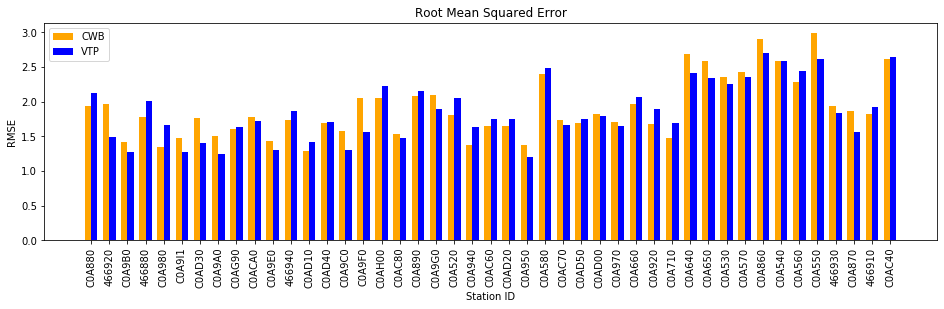

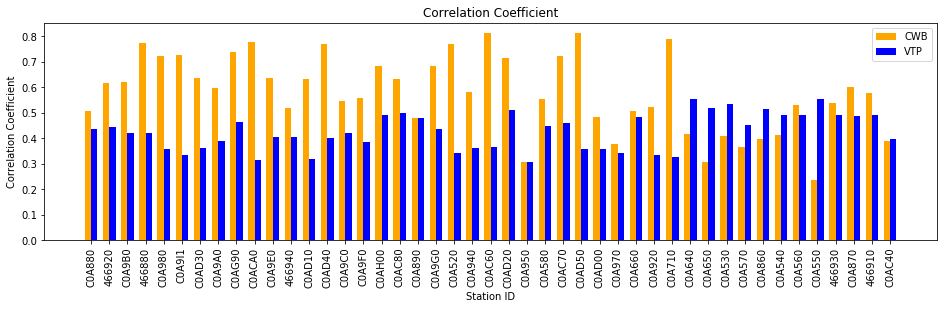

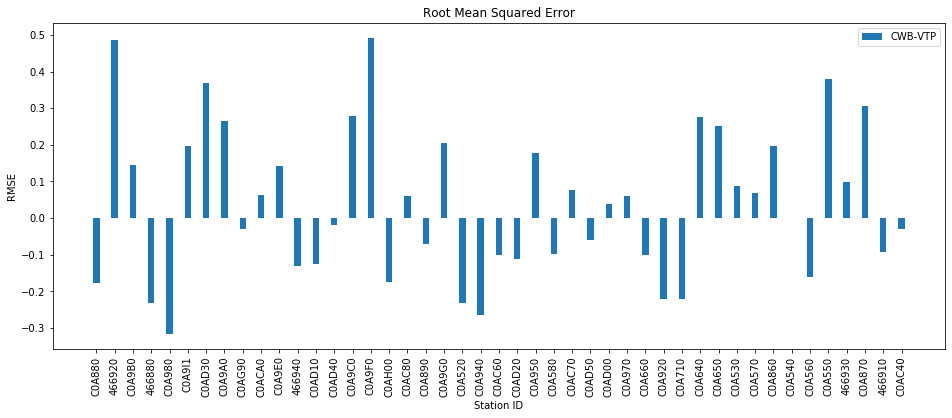

In [8]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt

complm_el = complm.sort_values('elevation').reset_index(drop=True)
compsvr_el = compsvr.sort_values('elevation').reset_index(drop=True)

x = np.arange(len(complm['id']))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(16,4))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Station ID')
plt.bar(x - width/2, complm_el['rmse_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, complm_el['rmse_lm'], width, color='blue', label='VTP')
plt.xticks(x, complm_el['id'], fontsize=10, rotation='vertical')
plt.legend(loc=0)
plt.show()

plt.figure(figsize=(16,4))
plt.title('Correlation Coefficient')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Station ID')
plt.bar(x - width/2, complm_el['corr_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, complm_el['corr_lm'], width, color='blue', label='VTP')
plt.xticks(x, complm_el['id'], fontsize=10, rotation='vertical')
plt.legend(loc=0)
plt.show()

plt.figure(figsize=(16,6))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Station ID')
plt.bar(x, complm_el['rmse_cwb'] - complm_el['rmse_lm'], width, label='CWB-VTP')
plt.xticks(x, complm_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

## Compre to NN+SVR

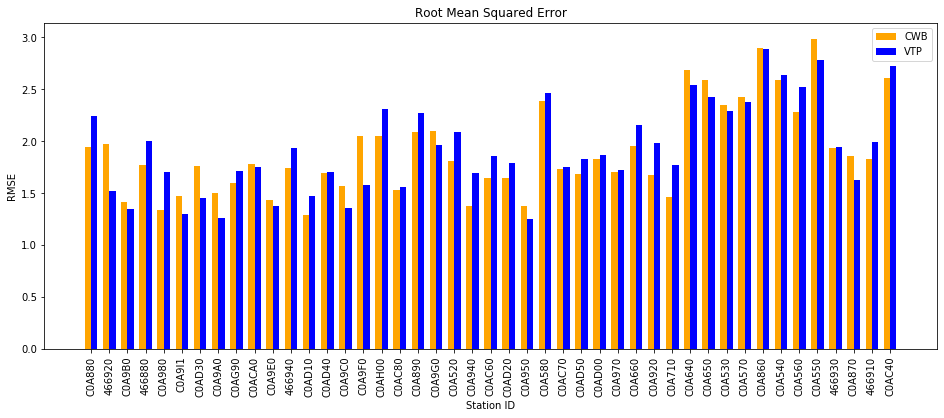

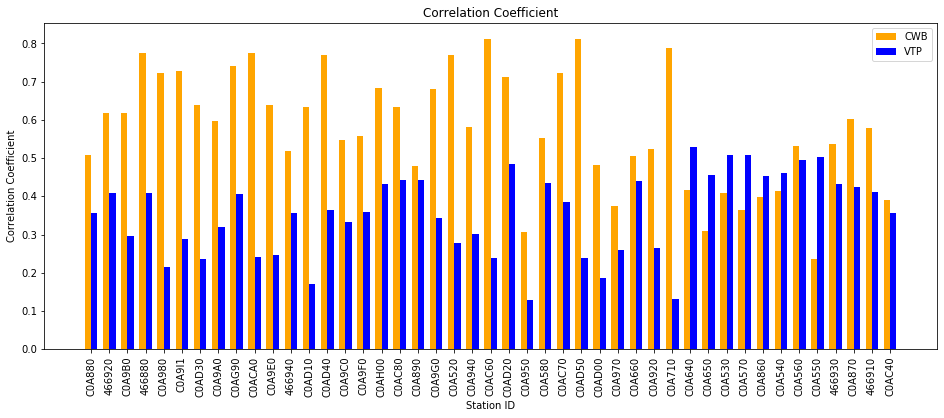

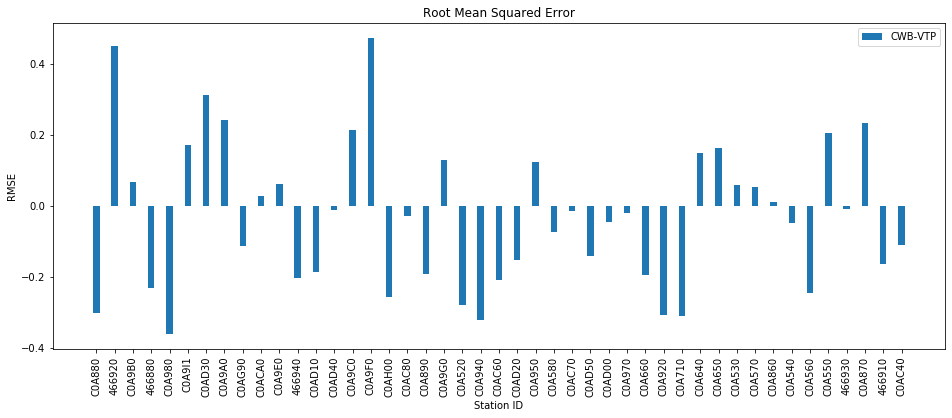

In [9]:
# Plot
plt.figure(figsize=(16,6))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Station ID')
plt.bar(x - width/2, compsvr_el['rmse_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, compsvr_el['rmse_svr'], width, color='blue', label='VTP')
plt.xticks(x, compsvr_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.title('Correlation Coefficient')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Station ID')
plt.bar(x - width/2, compsvr_el['corr_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, compsvr_el['corr_svr'], width, color='blue', label='VTP')
plt.xticks(x, compsvr_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Station ID')
plt.bar(x, compsvr_el['rmse_cwb'] - compsvr_el['rmse_svr'], width, label='CWB-VTP')
plt.xticks(x, compsvr_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

## Binary Classification

30mm/hr as threshold (99.9%).

In [3]:
# CWB QPE
evcwbbc = pd.read_csv('cwb_qpe_eval_2016_binary_classification.csv')
print(evcwbbc['prevalence'].describe())
# Our QPE
evbcglm = pd.read_csv('enc_bc_glm_test.csv')
evbcsvm = pd.read_csv('enc_bc_svm_test.csv')
# Prepare data for visualization
cwbbc = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwbbc.loc[:,['id','sensitivity','fpr','F1']], on='id')
compbcglm = cwbbc.merge(evbcglm.loc[:,['id','sensitivity','fpr','F1']], on='id', suffixes=('_cwb', '_glm'))
compbcsvm = cwbbc.merge(evbcsvm.loc[:,['id','sensitivity','fpr','F1']], on='id', suffixes=('_cwb', '_svm'))
#print(comp.head())
print(compbcglm.describe())
print(compbcsvm.describe())
#
compbcglm = compbcglm.sort_values('elevation').reset_index(drop=True)
compbcsvm = compbcsvm.sort_values('elevation').reset_index(drop=True)

count    45.000000
mean      0.000919
std       0.000554
min       0.000242
25%       0.000487
50%       0.000790
75%       0.001254
max       0.002070
Name: prevalence, dtype: float64
         elevation         lon        lat  sensitivity_cwb    fpr_cwb  \
count    45.000000   45.000000  45.000000        45.000000  45.000000   
mean    170.568889  121.589260  25.053096         0.362667   0.000509   
std     240.090615    0.155795   0.102089         0.328332   0.000350   
min       6.000000  121.346300  24.776200         0.000000   0.000000   
25%      26.700000  121.490400  24.993900         0.060000   0.000300   
50%      55.000000  121.546300  25.055400         0.220000   0.000400   
75%     241.000000  121.658800  25.117500         0.670000   0.000800   
max    1079.000000  122.002100  25.263800         1.000000   0.001500   

          F1_cwb  sensitivity_glm    fpr_glm     F1_glm  
count  45.000000        45.000000  45.000000  45.000000  
mean    0.284104         0.800000   0.013

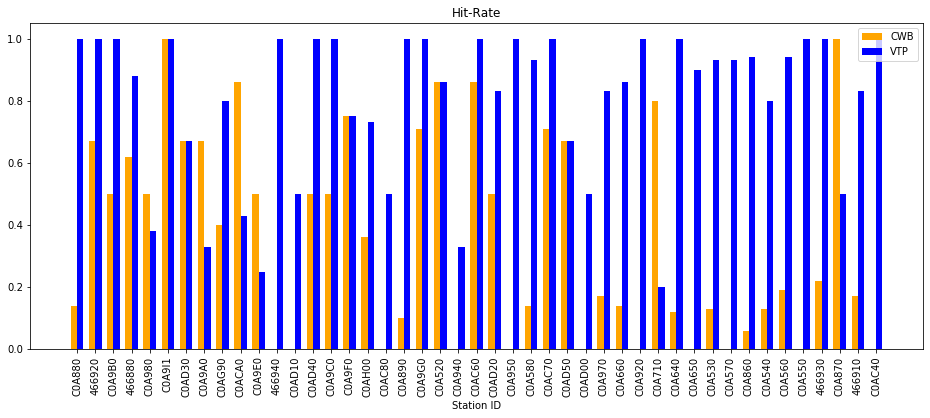

In [11]:
plt.figure(figsize=(16,6))
plt.title('Hit-Rate')
plt.xlabel('Station ID')
plt.bar(x - width/2, compbcglm['sensitivity_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, compbcglm['sensitivity_glm'], width, color='blue', label='VTP')
plt.xticks(x, compbcglm['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

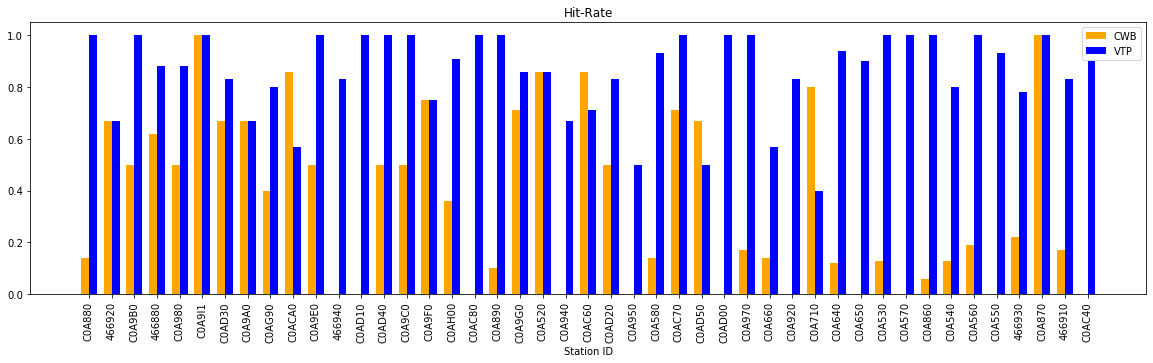

In [12]:
plt.figure(figsize=(20,5))
plt.title('Hit-Rate')
plt.xlabel('Station ID')
plt.bar(x - width/2, compbcsvm['sensitivity_cwb'], width, color='orange', label='CWB')
plt.bar(x + width/2, compbcsvm['sensitivity_svm'], width, color='blue', label='VTP')
plt.xticks(x, compbcsvm['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

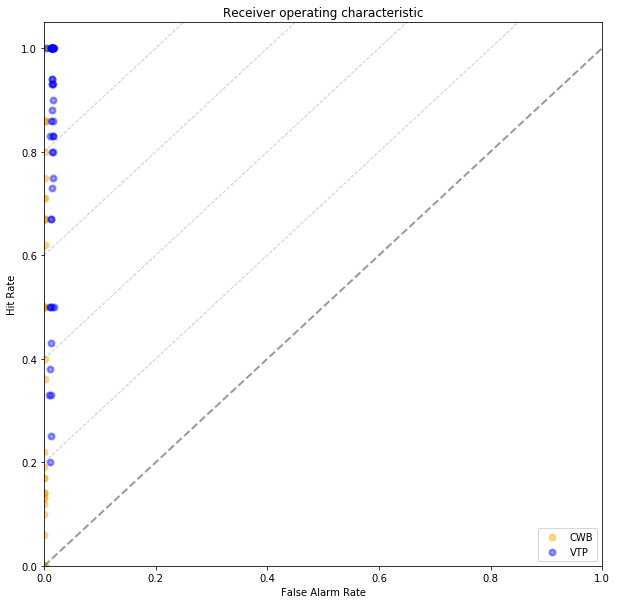

In [24]:

plt.figure(figsize=(10,10))
lw = 2
plt.scatter(compbcglm['fpr_cwb'], compbcglm['sensitivity_cwb'], color='orange', alpha=0.4, lw=lw, label='CWB')
plt.scatter(compbcglm['fpr_glm'], compbcglm['sensitivity_glm'], color='blue', alpha=0.4, lw=lw, label='VTP')
# helping lines
x = np.linspace(0, 1, 100)
plt.plot(x, x, color='grey', alpha=0.8, lw=lw, linestyle='--') # No skill line
plt.plot(x, x+0.2, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.4, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.6, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.8, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.ylabel('Hit Rate')
plt.xlabel('False Alarm Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


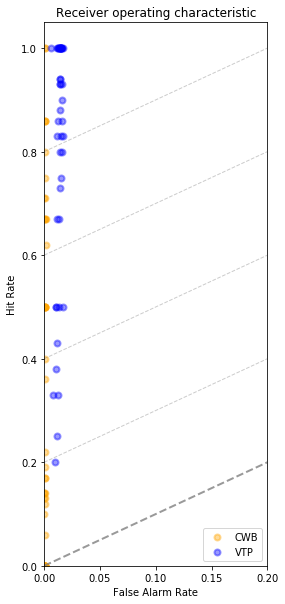

In [29]:
plt.figure(figsize=(4,10))
lw = 2
plt.scatter(compbcglm['fpr_cwb'], compbcglm['sensitivity_cwb'], color='orange', alpha=0.4, lw=lw, label='CWB')
plt.scatter(compbcglm['fpr_glm'], compbcglm['sensitivity_glm'], color='blue', alpha=0.4, lw=lw, label='VTP')
# helping lines
x = np.linspace(0, 0.2, 100)
plt.plot(x, x, color='grey', alpha=0.8, lw=lw, linestyle='--') # No skill line
plt.plot(x, x+0.2, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.4, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.6, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.plot(x, x+0.8, color='grey', alpha=0.4, lw=lw/2, linestyle='--') # No skill line
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.ylabel('Hit Rate')
plt.xlabel('False Alarm Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()